# Corporate Resilience Project - Manual Review & Analysis
## Notebook 3: Validate Matches and Create Final Crosswalk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import json
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded")
print(f"Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Mounted at /content/drive
✓ Libraries loaded
Started: 2025-12-05 04:58:56


## 1. Load Matching Results

In [ ]:
BASE_PATH = Path('/content/drive/MyDrive/Paper1_Dataset')
PROCESSED_PATH = BASE_PATH / 'processed'

print("="*80)
print("LOADING MATCHING RESULTS")
print("="*80)

# Load high-confidence matches
high_conf = pd.read_csv(PROCESSED_PATH / 'matches_high_confidence.csv')
print(f"\n✓ High-confidence matches: {len(high_conf):,}")
print(f"  Average score: {high_conf['MATCH_SCORE'].mean():.1f}")

# Load medium-confidence matches
try:
    medium_conf = pd.read_csv(PROCESSED_PATH / 'matches_medium_confidence.csv')
    print(f"\n✓ Medium-confidence matches: {len(medium_conf):,}")
    print(f"  Average score: {medium_conf['MATCH_SCORE'].mean():.1f}")
except:
    print("\n  Medium-confidence file not found (may still be processing)")
    medium_conf = pd.DataFrame()

# Load TRI data with matches
tri_data = pd.read_parquet(PROCESSED_PATH / 'tri_facilities_panel.parquet')
print(f"\n✓ TRI data: {len(tri_data):,} facility-year records")

print("\n" + "="*80)

LOADING MATCHING RESULTS

✓ High-confidence matches: 4,329
  Average score: 98.1

✓ Medium-confidence matches: 12,054
  Average score: 78.0

✓ TRI data: 1,148,673 facility-year records



## 2. Match Quality Overview

MATCH QUALITY ANALYSIS

Total matches: 16,383

Score distribution:
  100 (Exact): 3,337
  95-99: 77
  90-94: 915
  85-89: 1,931
  80-84: 2,960
  70-79: 7,163

Match type breakdown:
MATCH_TYPE
FUZZY_MEDIUM    12054
EXACT            3289
FUZZY_HIGH       1040
Name: count, dtype: int64


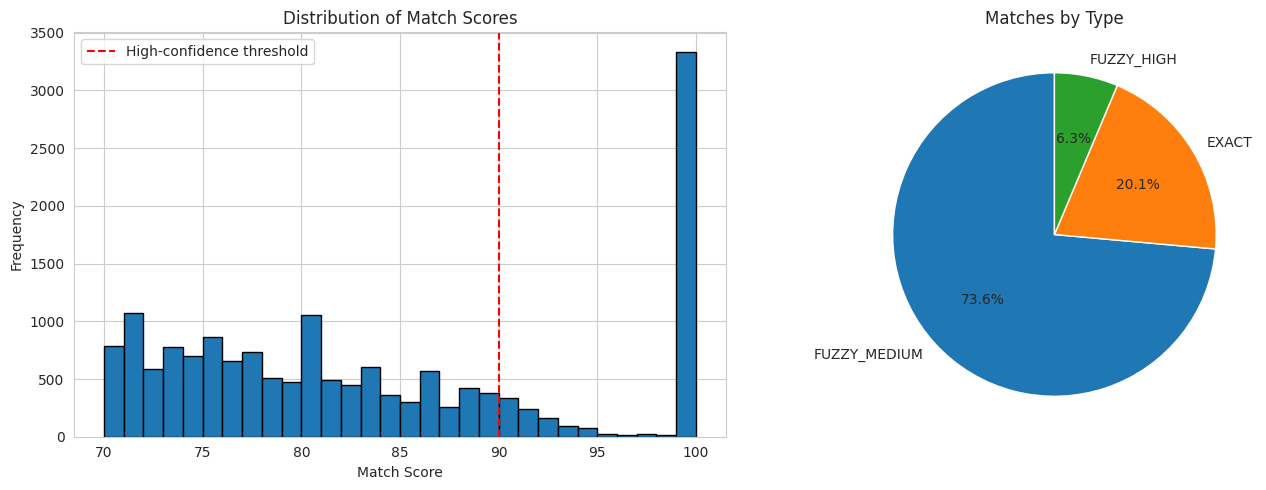


✓ Visualization saved


In [ ]:
print("="*80)
print("MATCH QUALITY ANALYSIS")
print("="*80)

# Score distribution
all_matches = pd.concat([high_conf, medium_conf], ignore_index=True) if len(medium_conf) > 0 else high_conf

print(f"\nTotal matches: {len(all_matches):,}")
print(f"\nScore distribution:")
print(f"  100 (Exact): {(all_matches['MATCH_SCORE']==100).sum():,}")
print(f"  95-99: {((all_matches['MATCH_SCORE']>=95) & (all_matches['MATCH_SCORE']<100)).sum():,}")
print(f"  90-94: {((all_matches['MATCH_SCORE']>=90) & (all_matches['MATCH_SCORE']<95)).sum():,}")
print(f"  85-89: {((all_matches['MATCH_SCORE']>=85) & (all_matches['MATCH_SCORE']<90)).sum():,}")
print(f"  80-84: {((all_matches['MATCH_SCORE']>=80) & (all_matches['MATCH_SCORE']<85)).sum():,}")
print(f"  70-79: {((all_matches['MATCH_SCORE']>=70) & (all_matches['MATCH_SCORE']<80)).sum():,}")

# Match type breakdown
print(f"\nMatch type breakdown:")
print(all_matches['MATCH_TYPE'].value_counts())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Score distribution histogram
axes[0].hist(all_matches['MATCH_SCORE'], bins=30, edgecolor='black')
axes[0].set_xlabel('Match Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Match Scores')
axes[0].axvline(90, color='red', linestyle='--', label='High-confidence threshold')
axes[0].legend()

# Match type pie chart
match_counts = all_matches['MATCH_TYPE'].value_counts()
axes[1].pie(match_counts.values, labels=match_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Matches by Type')

plt.tight_layout()
plt.savefig(PROCESSED_PATH / 'match_quality_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved")

## 3. Review Medium-Confidence Matches

These matches (70-89% similarity) require manual review to accept or reject.

In [ ]:
if len(medium_conf) > 0:
    print("="*80)
    print("MEDIUM-CONFIDENCE MATCHES FOR REVIEW")
    print("="*80)

    # Sort by score (highest first)
    medium_sorted = medium_conf.sort_values('MATCH_SCORE', ascending=False)

    # Display for review
    print(f"\nTotal to review: {len(medium_sorted):,}")
    print("\nTop 50 matches (highest scores first):")
    print("="*80)

    review_df = medium_sorted[['COMPANY_NAME_STD', 'COMNAM_STD', 'MATCH_SCORE', 'TICKER']].head(50)

    for idx, row in review_df.iterrows():
        print(f"\nScore: {row['MATCH_SCORE']}")
        print(f"  TRI:  {row['COMPANY_NAME_STD']}")
        print(f"  CRSP: {row['COMNAM_STD']} ({row['TICKER']})")
        print("-" * 80)

    # Save for external review
    review_file = PROCESSED_PATH / 'matches_for_manual_review.csv'
    medium_sorted.to_csv(review_file, index=False)
    print(f"\n✓ Full list saved: {review_file}")
    print("\nRECOMMENDATION:")
    print("  1. Download this file")
    print("  2. Add 'ACCEPT' column (YES/NO)")
    print("  3. Review each match manually")
    print("  4. Upload back as 'matches_reviewed.csv'")
else:
    print("\nNo medium-confidence matches to review")

MEDIUM-CONFIDENCE MATCHES FOR REVIEW

Total to review: 12,054

Top 50 matches (highest scores first):

Score: 89
  TRI:  PRO PRODUCTS
  CRSP: PRESTO PRODUCTS (nan)
--------------------------------------------------------------------------------

Score: 89
  TRI:  UNIVAR SOLUTIONS USA
  CRSP: UNIVAR SOLUTIONS (nan)
--------------------------------------------------------------------------------

Score: 89
  TRI:  BUCKEYE PARTNERS
  CRSP: BUCKEYE PARTNERS L P (nan)
--------------------------------------------------------------------------------

Score: 89
  TRI:  STANLEY FURNITURE
  CRSP: STANLEY FURNITURE NEW (nan)
--------------------------------------------------------------------------------

Score: 89
  TRI:  STANLEY FURNITURE
  CRSP: STANLEY FURNITURE NEW (nan)
--------------------------------------------------------------------------------

Score: 89
  TRI:  UNIVAR SOLUTIONS USA
  CRSP: UNIVAR SOLUTIONS (nan)
------------------------------------------------------------------------

## 4. Load Manual Review Decisions (Optional)

If you've completed manual review, upload `matches_reviewed.csv` and run this cell.

In [ ]:
# Try to load manual review file
review_file = PROCESSED_PATH / 'matches_reviewed.csv'

if review_file.exists():
    print("="*80)
    print("LOADING MANUAL REVIEW DECISIONS")
    print("="*80)

    reviewed = pd.read_csv(review_file)

    if 'ACCEPT' in reviewed.columns:
        accepted = reviewed[reviewed['ACCEPT'].isin(['YES', 'Y', '1', True, 'yes'])]
        rejected = reviewed[reviewed['ACCEPT'].isin(['NO', 'N', '0', False, 'no'])]

        print(f"\n✓ Manual review loaded")
        print(f"  Accepted: {len(accepted):,}")
        print(f"  Rejected: {len(rejected):,}")
        print(f"  Pending: {len(reviewed) - len(accepted) - len(rejected):,}")

        # Add accepted matches to high-confidence
        high_conf = pd.concat([high_conf, accepted], ignore_index=True)
        print(f"\n✓ Total validated matches: {len(high_conf):,}")
    else:
        print("\n⚠️  'ACCEPT' column not found in review file")
else:
    print("\nNo manual review file found - using only high-confidence matches")


No manual review file found - using only high-confidence matches


## 5. Spot-Check High-Confidence Matches

Random sample validation to verify match quality.

In [ ]:
print("="*80)
print("SPOT-CHECK: Random Sample of High-Confidence Matches")
print("="*80)

# Sample 30 random matches
sample = high_conf.sample(min(30, len(high_conf)), random_state=42)

print(f"\nReviewing {len(sample)} random matches:")
print("\n" + "="*80)

for idx, row in sample.iterrows():
    print(f"\nScore: {row['MATCH_SCORE']}  |  Type: {row['MATCH_TYPE']}")
    print(f"  TRI:  {row['COMPANY_NAME_STD']}")
    print(f"  CRSP: {row['COMNAM_STD']}")
    if pd.notna(row.get('TICKER')):
        print(f"  Ticker: {row['TICKER']}  |  PERMNO: {row['PERMNO']}")
    print("-" * 80)

print("\n✓ Manual verification: Do these matches look correct?")
print("  If most look good → Proceed to create final crosswalk")
print("  If many errors → Need to adjust matching parameters")

SPOT-CHECK: Random Sample of High-Confidence Matches

Reviewing 30 random matches:


Score: 90  |  Type: FUZZY_HIGH
  TRI:  TARR ACQUISITION
  CRSP: RXR ACQUISITION
--------------------------------------------------------------------------------

Score: 100  |  Type: EXACT
  TRI:  DONCASTERS
  CRSP: DONCASTERS
--------------------------------------------------------------------------------

Score: 100  |  Type: EXACT
  TRI:  KINDER MORGAN
  CRSP: KINDER MORGAN
  Ticker: KMI  |  PERMNO: 12558
--------------------------------------------------------------------------------

Score: 100  |  Type: EXACT
  TRI:  CROWN HOLDINGS
  CRSP: CROWN HOLDINGS
  Ticker: CCK  |  PERMNO: 17726
--------------------------------------------------------------------------------

Score: 100  |  Type: EXACT
  TRI:  CAPITAL SOUTHWEST
  CRSP: CAPITAL SOUTHWEST
  Ticker: CSWC  |  PERMNO: 21259
--------------------------------------------------------------------------------

Score: 93  |  Type: FUZZY_HIGH
  TRI:  L

## 6. Create Final TRI-CRSP Crosswalk

In [ ]:
print("="*80)
print("CREATING FINAL TRI-CRSP CROSSWALK")
print("="*80)

# Use all validated high-confidence matches
final_matches = high_conf.copy()

print(f"\nFinal validated matches: {len(final_matches):,}")
print(f"  Unique TRI companies: {final_matches['TRI_COMPANY_ID'].nunique():,}")
print(f"  Unique CRSP companies: {final_matches['PERMNO'].nunique():,}")

# Create company-level crosswalk
crosswalk = final_matches[[
    'TRI_COMPANY_ID', 'COMPANY_NAME', 'COMPANY_NAME_STD',
    'PERMNO', 'TICKER', 'CUSIP9', 'COMNAM', 'COMNAM_STD',
    'MATCH_SCORE', 'MATCH_TYPE'
]].copy()

# Remove duplicates (keep best match per TRI company)
crosswalk = crosswalk.sort_values(['TRI_COMPANY_ID', 'MATCH_SCORE'], ascending=[True, False])
crosswalk = crosswalk.drop_duplicates(subset=['TRI_COMPANY_ID'], keep='first')

print(f"\n✓ Crosswalk created: {len(crosswalk):,} unique company mappings")

# Save
crosswalk_file = PROCESSED_PATH / 'tri_crsp_crosswalk.csv'
crosswalk.to_csv(crosswalk_file, index=False)
print(f"\n✓ Saved: {crosswalk_file}")

# Also save final matches
final_file = PROCESSED_PATH / 'matches_final_validated.csv'
final_matches.to_csv(final_file, index=False)
print(f"✓ Saved: {final_file}")

CREATING FINAL TRI-CRSP CROSSWALK

Final validated matches: 4,329
  Unique TRI companies: 4,329
  Unique CRSP companies: 1,252

✓ Crosswalk created: 4,329 unique company mappings

✓ Saved: /content/drive/MyDrive/Paper1_Dataset/processed/tri_crsp_crosswalk.csv
✓ Saved: /content/drive/MyDrive/Paper1_Dataset/processed/matches_final_validated.csv


## 7. Apply Crosswalk to TRI Facilities

In [ ]:
print("="*80)
print("APPLYING CROSSWALK TO TRI FACILITIES")
print("="*80)

# Merge TRI data with crosswalk
# First create TRI_COMPANY_ID in tri_data by grouping
tri_data['TRI_COMPANY_ID'] = tri_data.groupby('COMPANY_NAME_STD').ngroup()

# Merge
tri_matched = tri_data.merge(
    crosswalk[['TRI_COMPANY_ID', 'PERMNO', 'TICKER', 'CUSIP9', 'MATCH_SCORE']],
    on='TRI_COMPANY_ID',
    how='left'
)

# Statistics
print(f"\nTotal facility-year records: {len(tri_matched):,}")
print(f"Records with CRSP match: {tri_matched['PERMNO'].notna().sum():,} ({tri_matched['PERMNO'].notna().sum()/len(tri_matched)*100:.1f}%)")
print(f"Unique matched facilities: {tri_matched[tri_matched['PERMNO'].notna()]['TRIFD'].nunique():,}")
print(f"Unique matched companies: {tri_matched['PERMNO'].nunique():,}")

# Save
output_file = PROCESSED_PATH / 'tri_facilities_matched_final.parquet'
tri_matched.to_parquet(output_file, index=False)
print(f"\n✓ Saved: {output_file}")
print(f"  File size: {output_file.stat().st_size / 1e6:.1f} MB")

APPLYING CROSSWALK TO TRI FACILITIES

Total facility-year records: 1,148,673
Records with CRSP match: 245,826 (21.4%)
Unique matched facilities: 5,822
Unique matched companies: 1,016

✓ Saved: /content/drive/MyDrive/Paper1_Dataset/processed/tri_facilities_matched_final.parquet
  File size: 37.5 MB


## 8. Matching Statistics & Analysis

In [ ]:
print("="*80)
print("COMPREHENSIVE MATCHING STATISTICS")
print("="*80)

stats = {}

# Overall stats
stats['total_tri_facilities'] = int(tri_data['TRIFD'].nunique())
stats['total_tri_companies'] = int(tri_data['COMPANY_NAME_STD'].nunique())
stats['total_crsp_companies'] = int(crosswalk['PERMNO'].nunique())

# Match stats
stats['matched_companies'] = int(len(crosswalk))
stats['match_rate_pct'] = float(len(crosswalk) / stats['total_tri_companies'] * 100)
stats['matched_facilities'] = int(tri_matched[tri_matched['PERMNO'].notna()]['TRIFD'].nunique())
stats['matched_facility_years'] = int(tri_matched['PERMNO'].notna().sum())

# Quality stats
stats['avg_match_score'] = float(crosswalk['MATCH_SCORE'].mean())
stats['exact_matches'] = int((crosswalk['MATCH_SCORE'] == 100).sum())
stats['fuzzy_matches'] = int((crosswalk['MATCH_SCORE'] < 100).sum())

# Coverage by year
yearly_coverage = tri_matched.groupby('DATA_YEAR').agg({
    'TRIFD': 'nunique',
    'PERMNO': lambda x: x.notna().sum()
})
yearly_coverage.columns = ['Total_Facilities', 'Matched_Facilities']
yearly_coverage['Match_Rate_Pct'] = (yearly_coverage['Matched_Facilities'] / yearly_coverage['Total_Facilities'] * 100).round(1)

# Print stats
print("\nOVERALL STATISTICS:")
print("-" * 80)
print(f"Total TRI facilities: {stats['total_tri_facilities']:,}")
print(f"Total TRI companies: {stats['total_tri_companies']:,}")
print(f"Matched to CRSP: {stats['matched_companies']:,} ({stats['match_rate_pct']:.1f}%)")
print(f"\nFacility Coverage:")
print(f"  Matched facilities: {stats['matched_facilities']:,}")
print(f"  Matched facility-years: {stats['matched_facility_years']:,}")
print(f"\nMatch Quality:")
print(f"  Average score: {stats['avg_match_score']:.1f}")
print(f"  Exact matches: {stats['exact_matches']:,} ({stats['exact_matches']/len(crosswalk)*100:.1f}%)")
print(f"  Fuzzy matches: {stats['fuzzy_matches']:,} ({stats['fuzzy_matches']/len(crosswalk)*100:.1f}%)")

print("\n\nYEARLY COVERAGE:")
print("-" * 80)
print(yearly_coverage)

# Save stats
stats_file = PROCESSED_PATH / 'quality_metrics.json'
with open(stats_file, 'w') as f:
    json.dump(stats, f, indent=2)
print(f"\n✓ Statistics saved: {stats_file}")

COMPREHENSIVE MATCHING STATISTICS

OVERALL STATISTICS:
--------------------------------------------------------------------------------
Total TRI facilities: 29,176
Total TRI companies: 15,834
Matched to CRSP: 4,329 (27.3%)

Facility Coverage:
  Matched facilities: 5,822
  Matched facility-years: 245,826

Match Quality:
  Average score: 98.1
  Exact matches: 3,337 (77.1%)
  Fuzzy matches: 992 (22.9%)


YEARLY COVERAGE:
--------------------------------------------------------------------------------
           Total_Facilities  Matched_Facilities  Match_Rate_Pct
DATA_YEAR                                                      
2009                  18984               17510            92.2
2010                  18885               17641            93.4
2012                  19117               17838            93.3
2013                  19245               18041            93.7
2014                  19351               18007            93.1
2015                  19342               17674 

## 9. Industry and Geographic Analysis

MATCHED FACILITIES BY STATE

Top 20 states by matched facilities:
State  Total_Facilities  Matched  Match_Rate
   TX              2864    26165       913.6
   OH              1879    16452       875.6
   IL              1464    14169       967.8
   CA              1853    12897       696.0
   IN              1260    12413       985.2
   PA              1543     9913       642.4
   MI              1105     9260       838.0
   LA               575     7912      1376.0
   WI              1139     7660       672.5
   NC              1150     7327       637.1
   AL               790     7212       912.9
   GA              1095     6983       637.7
   MO               738     6829       925.3
   TN               897     6547       729.9
   KY               606     6246      1030.7
   IA               621     6103       982.8
   NY               900     5970       663.3
   OK               612     4409       720.4
   MS               477     4307       902.9
   FL              1077     4217  

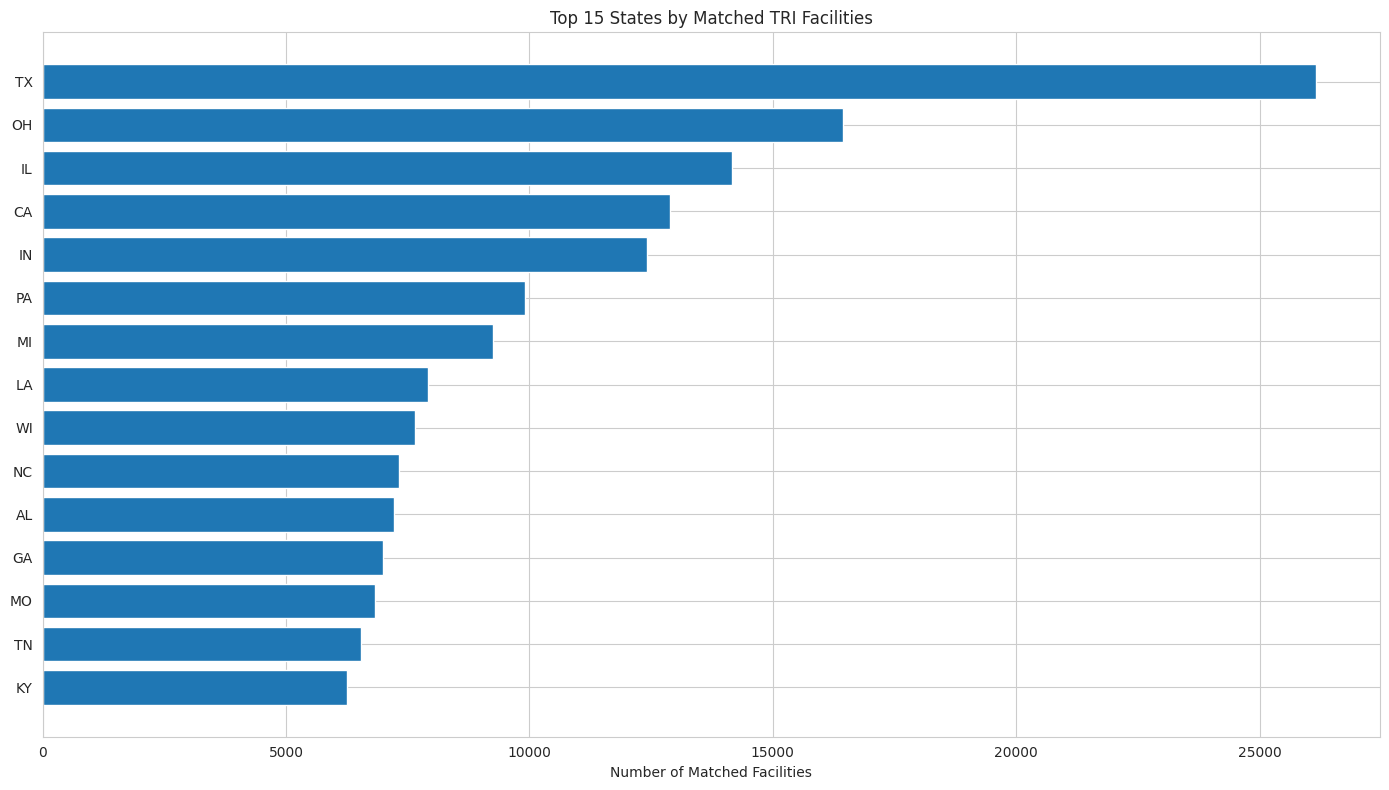


✓ State analysis complete


In [ ]:
print("="*80)
print("MATCHED FACILITIES BY STATE")
print("="*80)

# State analysis
state_analysis = tri_matched.groupby('STATE_ABBR').agg({
    'TRIFD': 'nunique',
    'PERMNO': lambda x: x.notna().sum()
}).reset_index()
state_analysis.columns = ['State', 'Total_Facilities', 'Matched']
state_analysis['Match_Rate'] = (state_analysis['Matched'] / state_analysis['Total_Facilities'] * 100).round(1)
state_analysis = state_analysis.sort_values('Matched', ascending=False)

print("\nTop 20 states by matched facilities:")
print(state_analysis.head(20).to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))
top_15 = state_analysis.head(15)
ax.barh(top_15['State'], top_15['Matched'])
ax.set_xlabel('Number of Matched Facilities')
ax.set_title('Top 15 States by Matched TRI Facilities')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig(PROCESSED_PATH / 'matches_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ State analysis complete")

## 10. Top Matched Companies

In [ ]:
print("="*80)
print("TOP MATCHED COMPANIES BY FACILITY COUNT")
print("="*80)

# Company analysis (without COMNAM since it's not in tri_matched)
company_facilities = tri_matched[tri_matched['PERMNO'].notna()].groupby(['PERMNO', 'TICKER']).agg({
    'TRIFD': 'nunique',
    'STATE_ABBR': lambda x: x.nunique()
}).reset_index()
company_facilities.columns = ['PERMNO', 'TICKER', 'Facilities', 'States']

# If you want company names, load the crosswalk
try:
    crosswalk = pd.read_csv(PROCESSED_PATH / 'tri_crsp_crosswalk.csv')
    company_facilities = company_facilities.merge(
        crosswalk[['PERMNO', 'COMNAM']].drop_duplicates(),
        on='PERMNO',
        how='left'
    )
    # Reorder columns
    company_facilities = company_facilities[['PERMNO', 'TICKER', 'COMNAM', 'Facilities', 'States']]
    company_facilities.columns = ['PERMNO', 'TICKER', 'Company', 'Facilities', 'States']
except:
    # If crosswalk not available, just use TICKER
    company_facilities['Company'] = company_facilities['TICKER']
    company_facilities = company_facilities[['PERMNO', 'TICKER', 'Company', 'Facilities', 'States']]

company_facilities = company_facilities.sort_values('Facilities', ascending=False)

print("\nTop 30 companies by number of TRI facilities:")
print(company_facilities.head(30).to_string(index=False))

# Save
company_file = PROCESSED_PATH / 'matched_companies_summary.csv'
company_facilities.to_csv(company_file, index=False)
print(f"\n✓ Company summary saved: {company_file}")

TOP MATCHED COMPANIES BY FACILITY COUNT

Top 30 companies by number of TRI facilities:
 PERMNO TICKER                          Company  Facilities  States
34817.0    NUE                       NUCOR CORP         249      40
84563.0   SLGN              SILGAN HOLDINGS INC         165      30
21178.0    LMT             LOCKHEED MARTIN CORP         148      31
17778.0   BRKA       BERKSHIRE HATHAWAY INC DEL          85      28
10516.0    ADM        ARCHER DANIELS MIDLAND CO          77      23
37568.0   FELE            FRANKLIN ELECTRIC INC          75      14
23712.0    PEG PUBLIC SERVICE ENTERPRISE GP INC          70      25
11809.0    CLH                CLEAN HARBORS INC          66      26
11762.0    ETN                   EATON CORP PLC          64      28
41355.0     PH             PARKER HANNIFIN CORP          59      27
77496.0    MHK            MOHAWK INDUSTRIES INC          56      26
25025.0    MFI             MF INTERNATIONAL LTD          46      19
11850.0    XOM               

## 11. Generate Final Report

In [ ]:
print("="*80)
print("GENERATING FINAL MATCHING REPORT")
print("="*80)

report = []
report.append("="*80)
report.append("FINAL MATCHING REPORT")
report.append(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report.append("="*80)
report.append("")

report.append("SUMMARY STATISTICS")
report.append("-"*80)
report.append(f"Total TRI Facilities: {stats['total_tri_facilities']:,}")
report.append(f"Total TRI Companies: {stats['total_tri_companies']:,}")
report.append(f"Successfully Matched: {stats['matched_companies']:,} ({stats['match_rate_pct']:.1f}%)")
report.append(f"Matched Facilities: {stats['matched_facilities']:,}")
report.append(f"Matched Facility-Years: {stats['matched_facility_years']:,}")
report.append("")

report.append("MATCH QUALITY")
report.append("-"*80)
report.append(f"Average Match Score: {stats['avg_match_score']:.1f}")
report.append(f"Exact Matches (100%): {stats['exact_matches']:,}")
report.append(f"Fuzzy Matches (90-99%): {stats['fuzzy_matches']:,}")
report.append("")

report.append("TOP 10 STATES BY MATCHED FACILITIES")
report.append("-"*80)
for _, row in state_analysis.head(10).iterrows():
    report.append(f"  {row['State']}: {row['Matched']:,} facilities ({row['Match_Rate']:.1f}% match rate)")
report.append("")

report.append("TOP 10 COMPANIES BY FACILITY COUNT")
report.append("-"*80)
for _, row in company_facilities.head(10).iterrows():
    ticker_str = f" ({row['TICKER']})" if pd.notna(row['TICKER']) else ""
    report.append(f"  {row['Company']}{ticker_str}: {row['Facilities']:,} facilities in {row['States']} states")
report.append("")

report.append("="*80)
report.append("NEXT STEPS")
report.append("-"*80)
report.append("1. Integrate disaster data (SHELDUS)")
report.append("2. Link to SEC EDGAR financial statements")
report.append("3. Begin resilience analysis")
report.append("="*80)

# Print and save
report_text = "\n".join(report)
print(report_text)

report_file = PROCESSED_PATH / 'final_matching_report.txt'
with open(report_file, 'w') as f:
    f.write(report_text)

print(f"\n✓ Report saved: {report_file}")

GENERATING FINAL MATCHING REPORT
FINAL MATCHING REPORT
Generated: 2025-12-05 04:59:45

SUMMARY STATISTICS
--------------------------------------------------------------------------------
Total TRI Facilities: 29,176
Total TRI Companies: 15,834
Successfully Matched: 4,329 (27.3%)
Matched Facilities: 5,822
Matched Facility-Years: 245,826

MATCH QUALITY
--------------------------------------------------------------------------------
Average Match Score: 98.1
Exact Matches (100%): 3,337
Fuzzy Matches (90-99%): 992

TOP 10 STATES BY MATCHED FACILITIES
--------------------------------------------------------------------------------
  TX: 26,165 facilities (913.6% match rate)
  OH: 16,452 facilities (875.6% match rate)
  IL: 14,169 facilities (967.8% match rate)
  CA: 12,897 facilities (696.0% match rate)
  IN: 12,413 facilities (985.2% match rate)
  PA: 9,913 facilities (642.4% match rate)
  MI: 9,260 facilities (838.0% match rate)
  LA: 7,912 facilities (1376.0% match rate)
  WI: 7,660 faci

## 12. Summary and Next Steps

In [ ]:
print("\n" + "="*80)
print("✅ MATCHING COMPLETE!")
print("="*80)

print("\nKEY METRICS:")
print("-" * 80)
print(f"  Match Rate: {stats['match_rate_pct']:.1f}% of TRI companies")
print(f"  Average Quality: {stats['avg_match_score']:.1f}/100")
print(f"  Facilities Covered: {stats['matched_facilities']:,}")
print(f"  Facility-Years: {stats['matched_facility_years']:,}")


✅ MATCHING COMPLETE!

KEY METRICS:
--------------------------------------------------------------------------------
  Match Rate: 27.3% of TRI companies
  Average Quality: 98.1/100
  Facilities Covered: 5,822
  Facility-Years: 245,826
